In [156]:
import pandas as pd
import numpy as np

In [142]:
df = pd.read_csv('train.csv')

In [143]:
import matplotlib.pyplot as plt

In [251]:
survived = len(df[df['Survived'] == 1])
died = len(df[df['Survived'] == 0])
pclass = df['Pclass']
pclass1 = len(df[df['Pclass'] == 1])
pclass2 = len(df[df['Pclass'] == 2])
pclass3 = len(df[df['Pclass'] == 3])
age = df['Age']
male = len(df[df['Sex'] == 'male'])
female = len(df[df['Sex'] == 'female'])
parch = df['Parch']

male1 = len(df[(df['Pclass'] == 1) & (df['Sex'] == 'male')])
male2 = len(df[(df['Pclass'] == 2) & (df['Sex'] == 'male')])
male3 = len(df[(df['Pclass'] == 3) & (df['Sex'] == 'male')])
female1 = len(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')])
female2 = len(df[(df['Pclass'] == 2) & (df['Sex'] == 'female')])
female3 = len(df[(df['Pclass'] == 3) & (df['Sex'] == 'female')])

# Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex, Parch

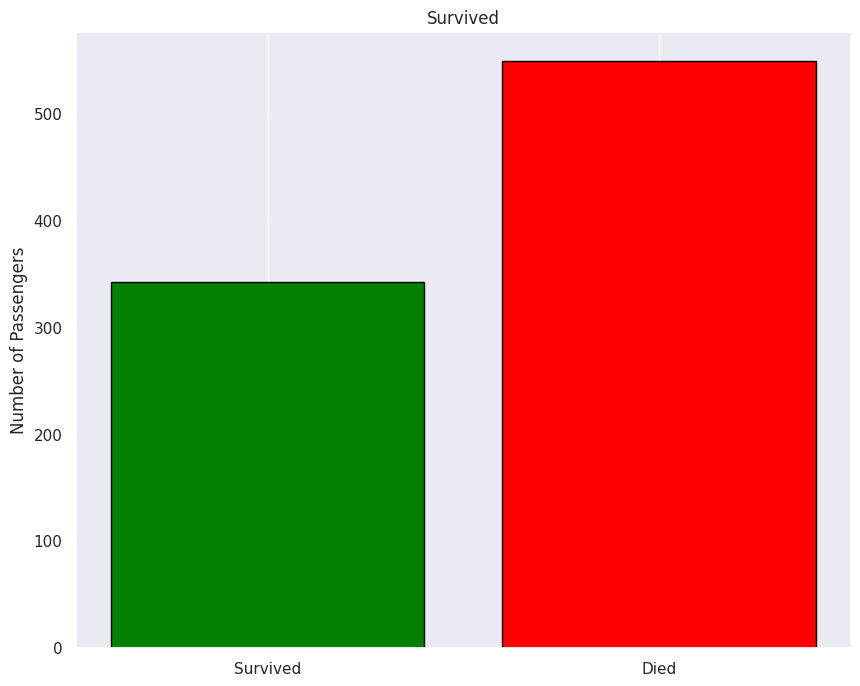

In [205]:
fig, ax = plt.subplots()
x = ['Survived', 'Died']
y = [survived, died]

ax.bar(x=x, height=y, color=['green', 'red'], edgecolor='black')

plt.title('Survived')
plt.ylabel('Number of Passengers')
plt.grid(True, axis='y', alpha=0.1)
plt.show()

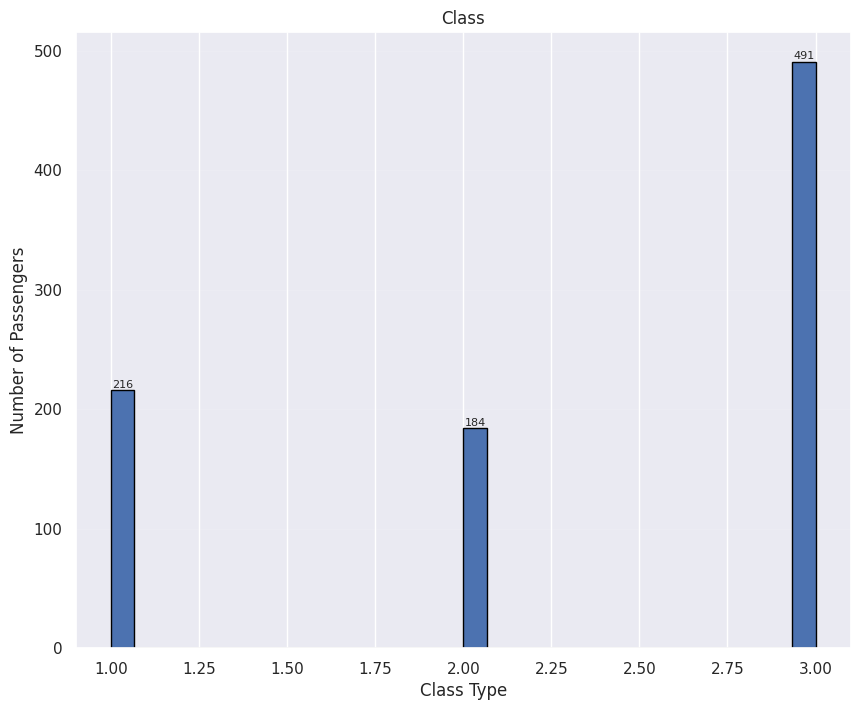

In [204]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(pclass, bins=30, edgecolor='black')

# подписи
for count, patch in zip(counts, patches):
    if count > 0:
        x = patch.get_x() + patch.get_width() / 2  # центр столбца
        y = patch.get_height()
        ax.text(x, y + 0.5, str(int(count)), ha='center', va='bottom', fontsize=8)

plt.title('Class')
plt.xlabel('Class Type')
plt.ylabel('Number of Passengers')
plt.grid(True, axis='y', alpha=0.1)
plt.show()

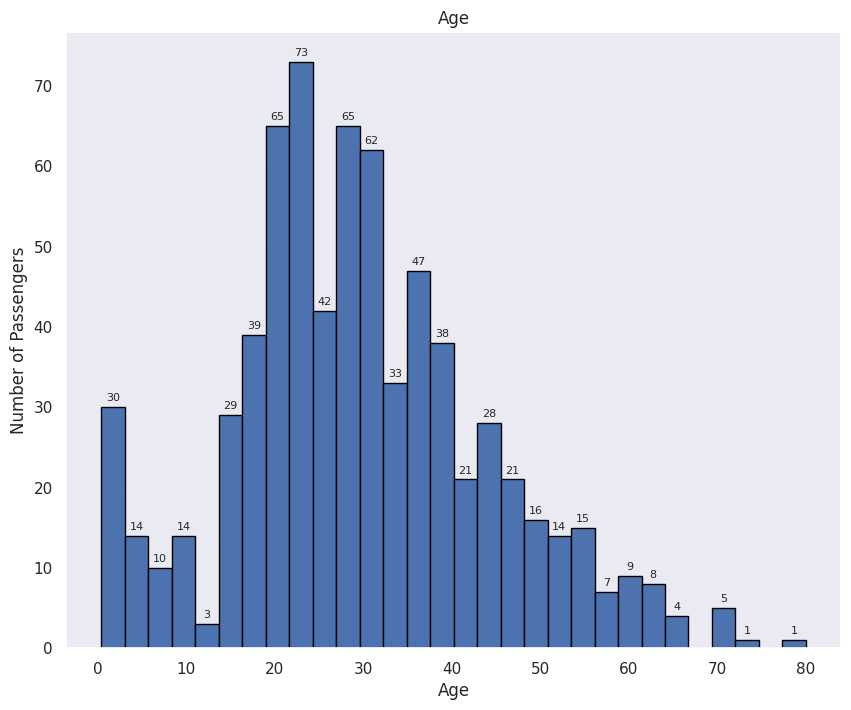

In [203]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(age, bins=30, edgecolor='black')

# подписи
for count, patch in zip(counts, patches):
    if count > 0:
        x = patch.get_x() + patch.get_width() / 2  # центр столбца
        y = patch.get_height()
        ax.text(x, y + 0.5, str(int(count)), ha='center', va='bottom', fontsize=8)

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(True, alpha=0.1)
plt.show()

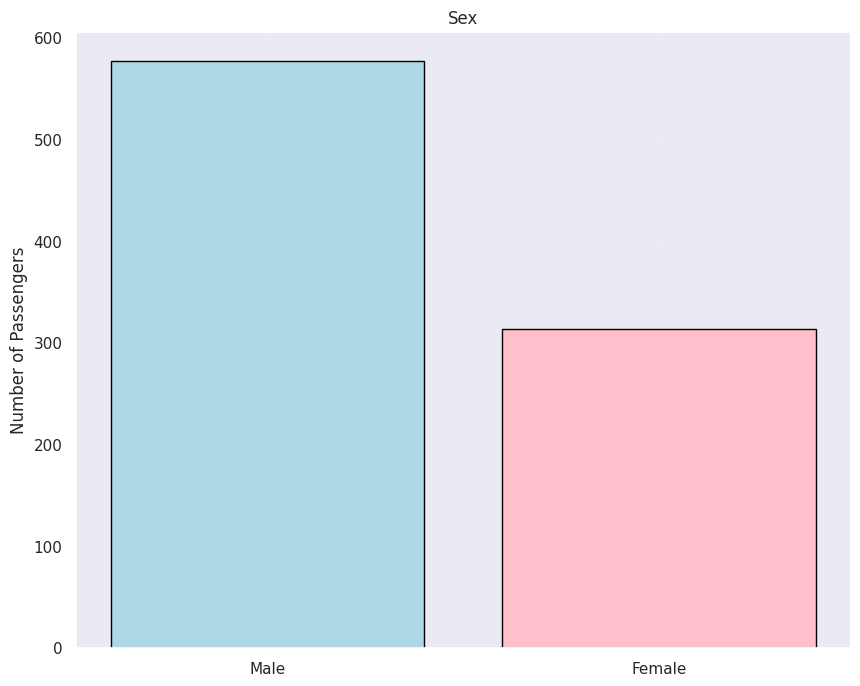

In [202]:
fig, ax = plt.subplots()
x = ['Male', 'Female']
y = [male, female]
ax.bar(x=x, height=y, color=['lightblue', 'pink'], edgecolor='black')
plt.title('Sex')
plt.ylabel('Number of Passengers')
plt.grid(True, alpha=0.1)
plt.show()

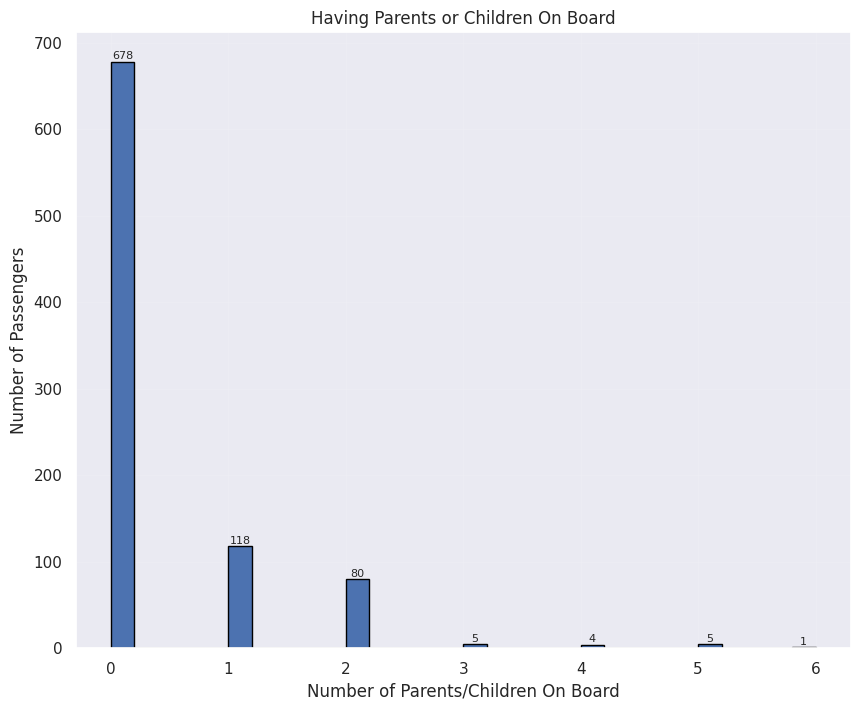

In [201]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(parch, bins=30, edgecolor='black')

# подписи
for count, patch in zip(counts, patches):
    if count > 0:
        x = patch.get_x() + patch.get_width() / 2  # центр столбца
        y = patch.get_height()
        ax.text(x, y + 0.5, str(int(count)), ha='center', va='bottom', fontsize=8)

plt.title('Having Parents or Children On Board')
plt.xlabel('Number of Parents/Children On Board')
plt.ylabel('Number of Passengers')
plt.grid(True, alpha=0.1)
plt.show()

# Постройте график типа boxplot для столбца Age; Проинтепретируйте полученный график

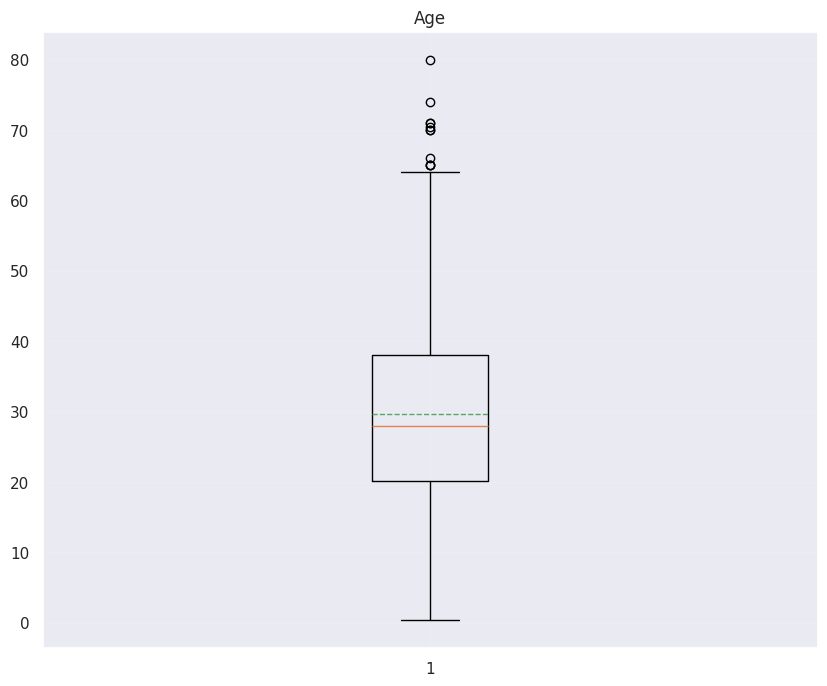

In [200]:
fig, ax = plt.subplots()

box = ax.boxplot(age.dropna(), showmeans=True, meanline=True) # без .dropna() выдает ошибку
plt.title('Age')
plt.grid(True, alpha=0.1)
plt.show()

In [181]:
Q1 = box['boxes'][0].get_ydata()[0]
Q3 = box['boxes'][0].get_ydata()[2]
Q2 = box['medians'][0].get_ydata()[0]
mean = box['means'][0].get_ydata()[0]
whisker_0 = box['whiskers'][0].get_ydata()[1]
whisker_1 = box['whiskers'][1].get_ydata()[1]
fliers = box['fliers'][0].get_ydata()

print(f'Межквартильный размах: от {Q1} до {Q3}')
print(f'Медианный возраст: {Q2}')
print(f'Средний возраст: {mean}')
print(f'Нижний край распределения: {whisker_0}')
print(f'Верхний край распределения: {whisker_1}')
print(f'Выбросы: {fliers}')

Межквартильный размах: от 20.125 до 38.0
Медианный возраст: 28.0
Средний возраст: 29.69911764705882
Нижний край распределения: 0.42
Верхний край распределения: 64.0
Выбросы: [66.  65.  71.  70.5 65.  65.  71.  80.  70.  70.  74. ]


# Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах

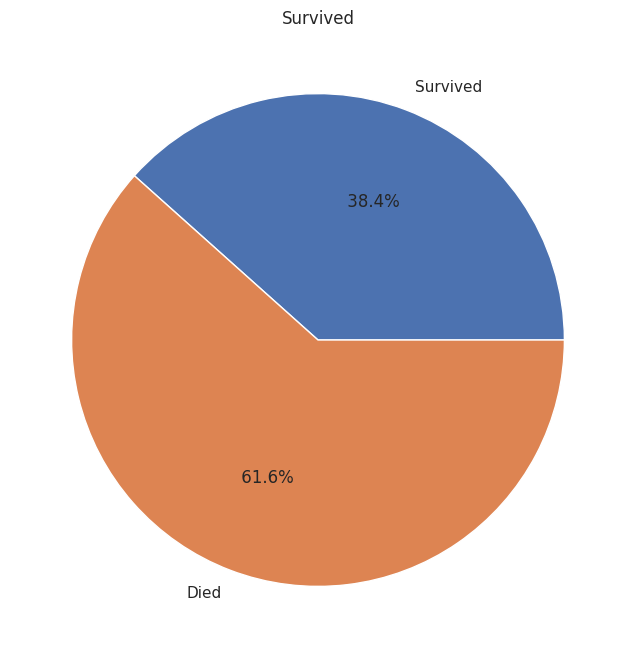

In [194]:
labels = ['Survived', 'Died']
value = [survived, died]

fig, ax = plt.subplots()
ax.pie(value, labels=labels, autopct= ' %1.1f%%')
plt.title('Survived')
plt.show()

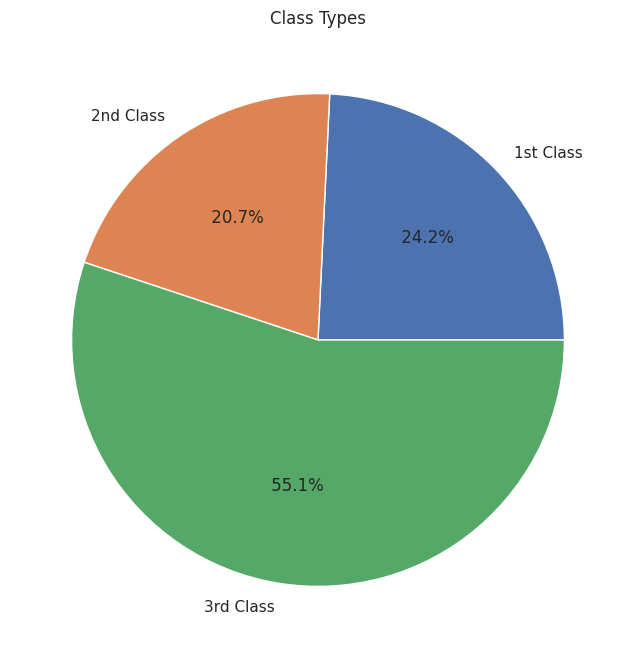

In [199]:
labels = ['1st Class', '2nd Class', '3rd Class']
value = [pclass1, pclass2, pclass3]

fig, ax = plt.subplots()
ax.pie(value, labels=labels, autopct= ' %1.1f%%')
plt.title('Class Types')
plt.show()

# Постройте график типа pairplot для всех числовых переменных датасета

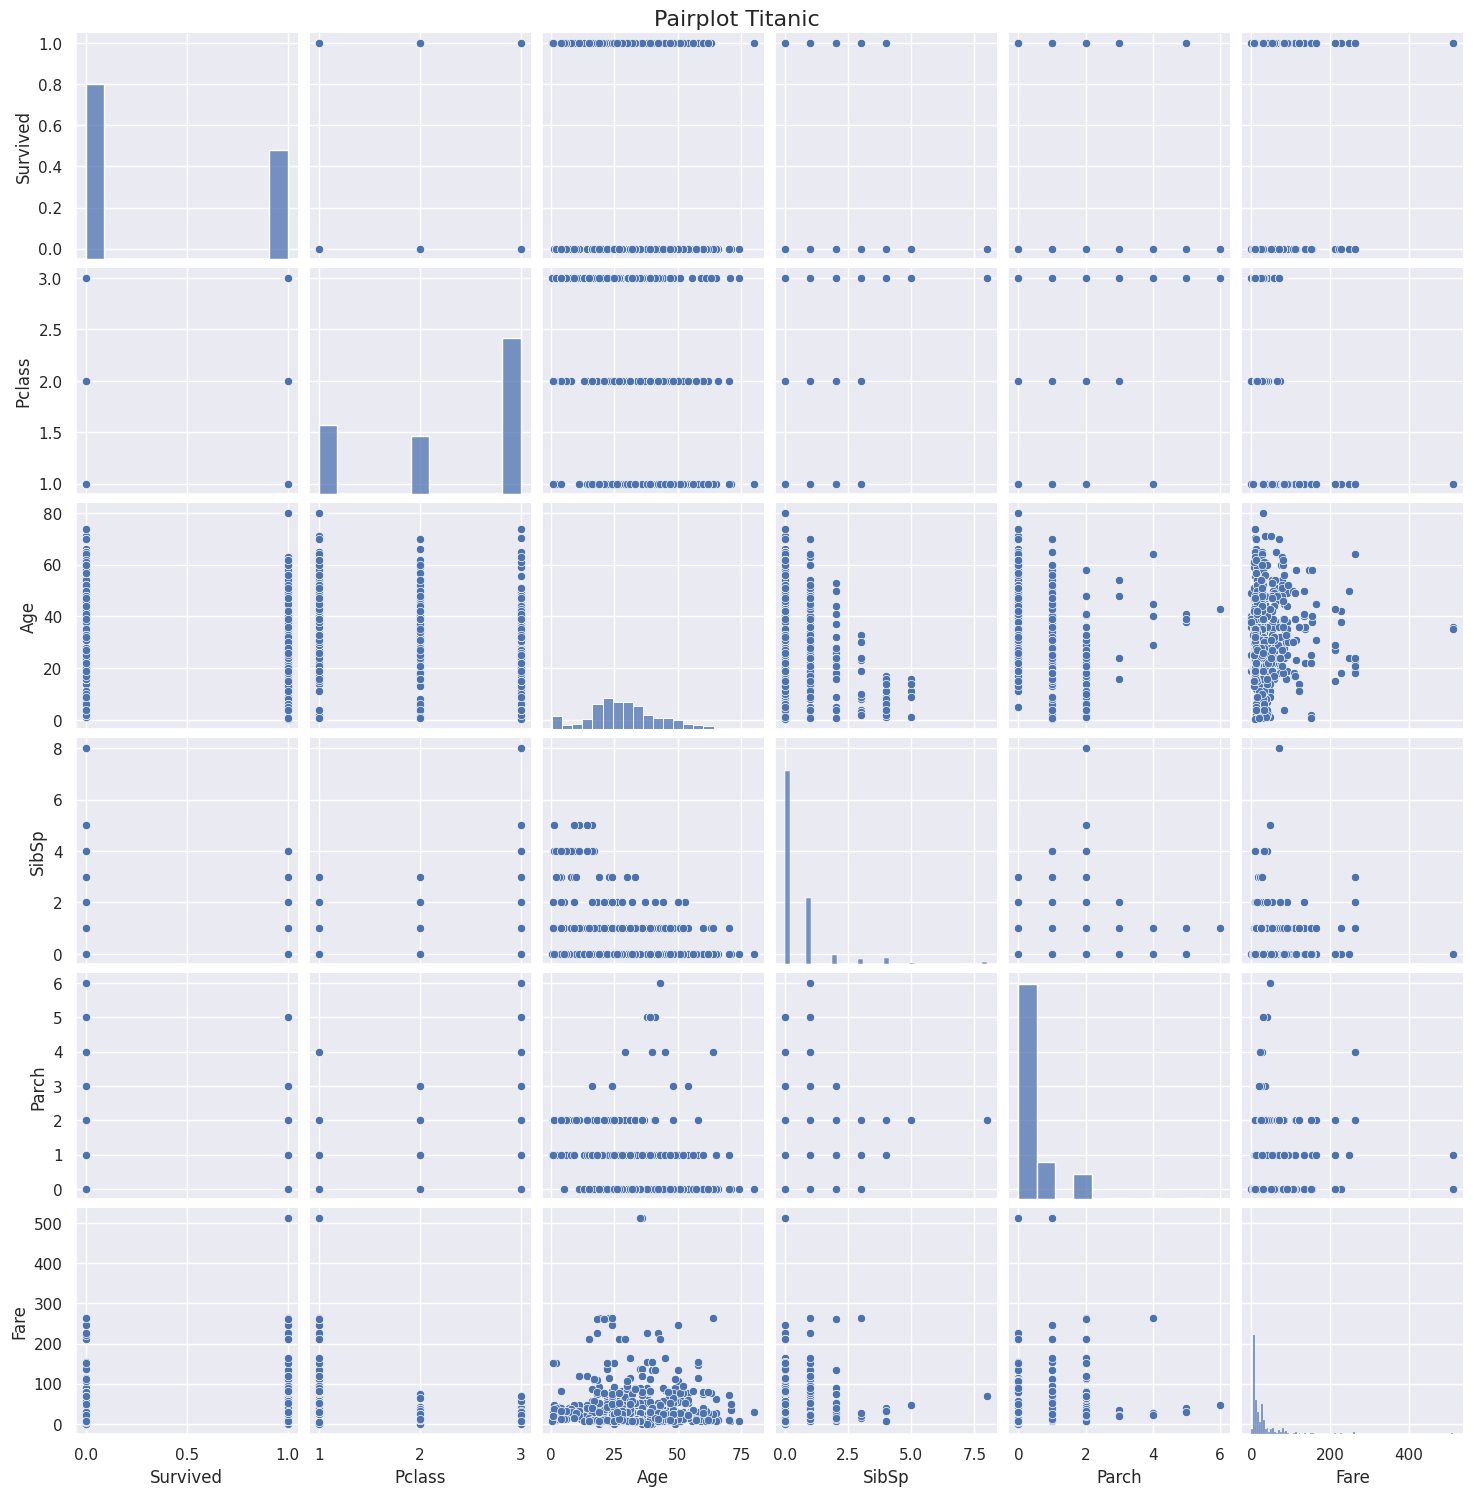

In [198]:
import seaborn as sns

sns.pairplot(df.drop(columns=['PassengerId']))

plt.suptitle('Pairplot Titanic', fontsize=16, y=1)
plt.show()

# Постройте интерактивный sunburst plot

In [253]:
import plotly.express as px

total = len(pclass)

data = dict(
    categories = ['Total', '1st Class', '2nd Class', '3rd Class',
                  'Male', 'Female',
                  'Male', 'Female',
                  'Male', 'Female'],
    parent = ['', 'Total', 'Total', 'Total',
              '1st Class', '1st Class',
              '2nd Class', '2nd Class',
              '3rd Class', '3rd Class'],
    value = [total, pclass1, pclass2, pclass3,
             male1, female1, male2, female2, male3, female3]
)

fig = px.sunburst(data, names='categories', parents='parent', values='value', branchvalues='total')
fig.update_layout(title='The Passengers of Titanic: Class Types & Sex')
fig.show()